In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
data = pd.read_csv('final.csv',low_memory=False)
data

,TRIP_ID,ROUTE,DAY_OF_WEEK,DATE,UNICORN,START_TIME,HEADSIGN,STOP_ID,STOP_SEQUENCE,STOP_NAME,SHAPE_DIST_TRAVELED,DELAY,DIFF_DELAY,SEQUENCE
0,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1502Z2,14,"Dolní Břežany,Náměstí",13.17849,98.0,0.0,1
1,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1501Z2,15,"Dolní Břežany,Na kopečku",13.80006,32.0,-66.0,2
2,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U545Z2,16,Písnice,16.55734,45.0,13.0,3
3,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U546Z2,17,Ke Březině,16.93703,29.0,-16.0,4
4,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U871Z2,18,Lipovická,17.13697,11.0,-18.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,331_257_200302,331,Wednesday,2020-05-13,331_257_200302_13_May,08:39:00,"Praha,Kačerov",U749Z2,21,Tempo,15.98916,7.0,10.0,11
4391,331_257_200302,331,Wednesday,2020-05-13,331_257_200302_13_May,08:39:00,"Praha,Kačerov",U656Z2,22,Sídliště Krč,16.32799,3.0,-4.0,12
4392,331_257_200302,331,Wednesday,2020-05-13,331_257_200302_13_May,08:39:00,"Praha,Kačerov",U893Z4,23,Zálesí,16.79198,12.0,9.0,13
4393,331_257_200302,331,Wednesday,2020-05-13,331_257_200302_13_May,08:39:00,"Praha,Kačerov",U488Z7,24,Nemocnice Krč,17.34484,-21.0,-33.0,14


In [19]:
# pro histogramy si vyfiltruju za každý den do/odpo (nebo jak je libo)

#pondeli_rano_tam=tripId[(tripId ['DATE'] == '27 Apr') & (tripId['HEADSIGN'].isin(['Praha,Kačerov','Praha,Budějovická']))&(tripId ['START_TIME'] < '11:00:00')]

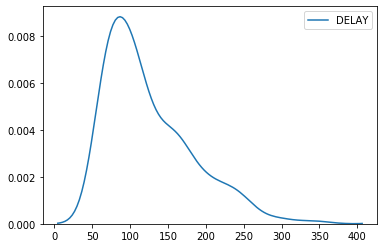

In [20]:
# HISTOGRAM č.1
# s tím delay se dá hrát(např. linky co jsou mega moc nebo málo zpožděné, 
# nebo ho prostě ingnorotvat tím, že tam nastavíme podmínku, kterou splnují všechny linky
sns.kdeplot(data[data['DAY_OF_WEEK']=='Monday'].query('DELAY > 60').DELAY)

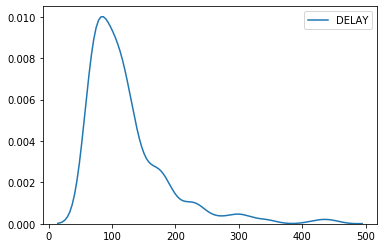

In [21]:
sns.kdeplot(data[data['DAY_OF_WEEK']=='Tuesday'].query('DELAY > 60').DELAY)

In [33]:
data[data['SEQUENCE']!=14]['DIFF_DELAY'].describe()

count    4102.000000
mean        0.977816
std        29.951163
min      -127.000000
25%       -17.000000
50%         0.000000
75%        16.000000
max       352.000000
Name: DIFF_DELAY, dtype: float64

In [35]:
data[data['SEQUENCE']==14]['DIFF_DELAY'].describe()

count    293.000000
mean      11.532423
std       36.012695
min      -60.000000
25%      -15.000000
50%        5.000000
75%       38.000000
max      111.000000
Name: DIFF_DELAY, dtype: float64

In [28]:
# HISTOGRAM č.2
# Je potřeba se podívat na max a min(range) z hodnot a vyhodit "špatné záznamy"..
#..zvolit si počet bins a vhodně zvolený dataframe
pokus = data.groupby('SEQUENCE')['DIFF_DELAY'].describe()

# data_pokus.min()
# data_pokus.max()

# plt.hist(data_pokus, range = (-7, 216), bins = 10, edgecolor='black')

# plt.title("Počet dopoledních spojů v pondělí a jejich průměrné zpozdění na trase")
# plt.xlabel("Delay")
# plt.ylabel("Count")
# np.histogram(data_pokus, range = (-7, 216), bins = 8)

,count,mean,std,min,25%,50%,75%,max
SEQUENCE,,,,,,,,
1,293.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,293.0,0.825939,52.256615,-79.0,-38.0,-10.0,31.0,352.0
3,293.0,-1.846416,29.468702,-127.0,-21.0,-2.0,16.0,143.0
4,293.0,-8.143345,15.287651,-54.0,-19.0,-9.0,1.0,55.0
5,293.0,-19.225256,16.104234,-52.0,-31.0,-20.0,-10.0,33.0
6,293.0,20.805461,18.286149,-20.0,7.0,20.0,33.0,92.0
7,293.0,15.634812,20.381122,-34.0,1.0,15.0,28.0,92.0
8,293.0,12.286689,23.859744,-31.0,-7.0,10.0,26.0,88.0
9,293.0,-2.034130,24.333278,-47.0,-20.0,-5.0,13.0,101.0


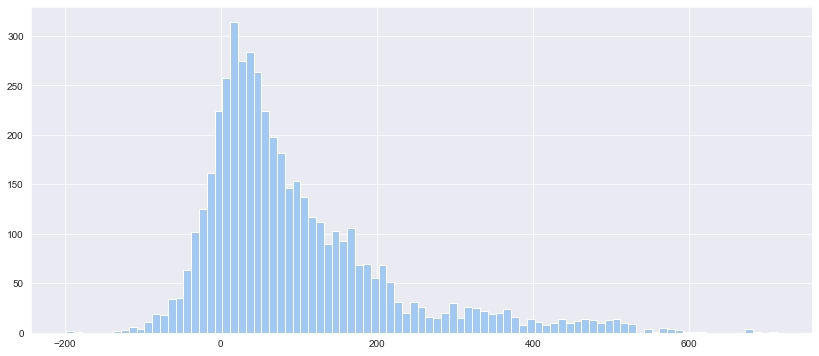

In [48]:
# HISTOGRAM č.3..asi zbytečná další verze..ale chtěla jsem vědět, jak se to chová
datum=tripId[tripId['DATE'].isin(['04 May'])& (tripId['HEADSIGN'].isin(['Praha,Kačerov','Praha,Budějovická']))]
bin_values = np.arange(start=-198.0, stop=722.0, step=10)
#vyhodím chybné záznamy
drop_jedna=datum[datum.UNICORN != '333_1100_200302_04_May']
drop_dva =datum[datum.UNICORN != '333_1101_200302_04_May']

histogramy=drop_dva.sort_values(by='DELAY', ascending=False)

histogramy['DELAY'].hist(bins=bin_values, figsize=[14,6])

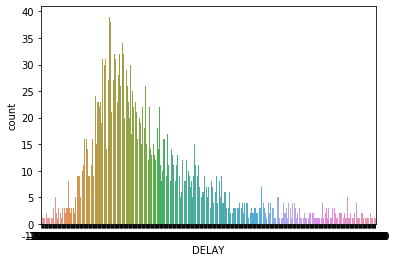

In [39]:
## HISTOGRAM č.4 pouze asi secte uuuuplně všechny spoje v datasetu:D
sns.countplot(histogramy['DELAY'])
plt.show()

In [ ]:
#Porovnávám v jednom grafu např. všechny podnělky dopo, nebo podle libosti dle zadaných kritérií..musí být dataframe, 
# a jelikož neumím moc zacházet s agregací, je to opět histogram

# osa y má nějaký divný jednoty a popisky

utery_rano_tam=tripId[(tripId ['DATE'] == '28 Apr') & (tripId['HEADSIGN'].isin(['Praha,Kačerov','Praha,Budějovická']))
                                       &(tripId ['START_TIME'] < '11:00:00')]


utery_rano_tam_05=tripId[(tripId ['DATE'] == '05 May') & (tripId['HEADSIGN'].isin(['Praha,Kačerov','Praha,Budějovická']))
                                       &(tripId ['START_TIME'] < '11:00:00')]

streda_rano_tam_05=tripId[(tripId ['DATE'] == '06 May') & (tripId['HEADSIGN'].isin(['Praha,Kačerov','Praha,Budějovická']))
                                       &(tripId ['START_TIME'] < '11:00:00')]
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.kdeplot(utery_rano_tam['DELAY'], shade=True)
sns.kdeplot(utery_rano_tam_05['DELAY'], shade=True)
sns.kdeplot(streda_rano_tam_05['DELAY'], shade=True)
plt.legend()
plt.show()

In [44]:
tripId['DATE'].unique()

array(['03 May', '02 May', '27 Apr', '28 Apr', '30 Apr', '01 May',
       '06 May', '07 May', '08 May', '09 May', '04 May', '05 May'],
      dtype=object)

  ...podobný grafík, který bychom chtěly vyrobit thttps://ai.googleblog.com/2019/06/predicting-bus-delays-with-machine.html)
Rádi bychom zobrazily na kterém km jsou zpoždění nejvytší -- > hodit do mapky,graficky zobrazit
Zjistit zda by se na základě našich hodnot dal vytvořit model, který by vypočítal zpoždění uvedených autobusů na konkrétních spojů
